In [2]:
%cd ..

d:\Projects\Coding\Python\academic\MLOps\Life Expectancy


In [3]:
import pandas as pd

df = pd.read_csv(r'data\Life-Expectancy-Data-Updated.csv')

In [4]:
# dropping identifiers
df = df.drop(['Country', 'Region', 'Year', 'Economy_status_Developed', 'Economy_status_Developing'], axis=1)
df.head()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy
0,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,76.5
1,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,82.8
2,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,65.4
3,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,67.0
4,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,81.7


In [7]:
# avg the features
df['vaccine_index'] = (df['Polio'] + df['Diphtheria']) / 2
df['Thinness_Index'] = (df['Thinness_ten_nineteen_years'] + df['Thinness_five_nine_years']) / 2

# drop features
df = df.drop(['Polio', 'Diphtheria', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Infant_deaths'], axis=1)
df

,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Incidents_HIV,GDP_per_capita,Population_mln,Schooling,Life_expectancy,vaccine_index,Thinness_Index
0,13.0,105.8240,1.320,97,65,27.8,0.08,11006,78.53,7.8,76.5,97.0,4.85
1,3.3,57.9025,10.350,97,94,26.0,0.09,25742,46.44,9.7,82.8,97.0,0.55
2,67.9,201.0765,1.570,60,35,21.2,0.13,1076,1183.21,5.0,65.4,65.5,27.55
3,40.5,222.1965,5.680,93,74,25.3,0.79,4146,0.75,7.9,67.0,92.5,5.60
4,4.3,57.9510,2.890,97,89,27.0,0.08,33995,7.91,12.8,81.7,94.0,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,224.9,291.8240,0.092,72,64,20.8,0.49,399,11.33,1.1,49.9,37.5,12.85
2860,28.6,235.2330,6.560,97,97,25.3,0.02,2515,2.67,9.1,66.9,95.5,2.25
2861,28.9,134.8950,1.560,62,95,21.9,0.02,2130,19.39,10.3,74.3,97.0,15.45
2862,9.9,204.0120,11.000,94,95,26.1,0.05,7424,3.44,11.1,71.8,96.0,3.30


In [13]:
df = df.drop(['Adult_mortality', 'Under_five_deaths'], axis=1)

In [14]:
# seperate features and target columns
x = df.drop('Life_expectancy', axis=1)
y = df['Life_expectancy']

In [16]:
x = x[['Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Schooling', 'vaccine_index', 'Thinness_Index']]

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2, random_state=64)

In [31]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=15)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [32]:
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

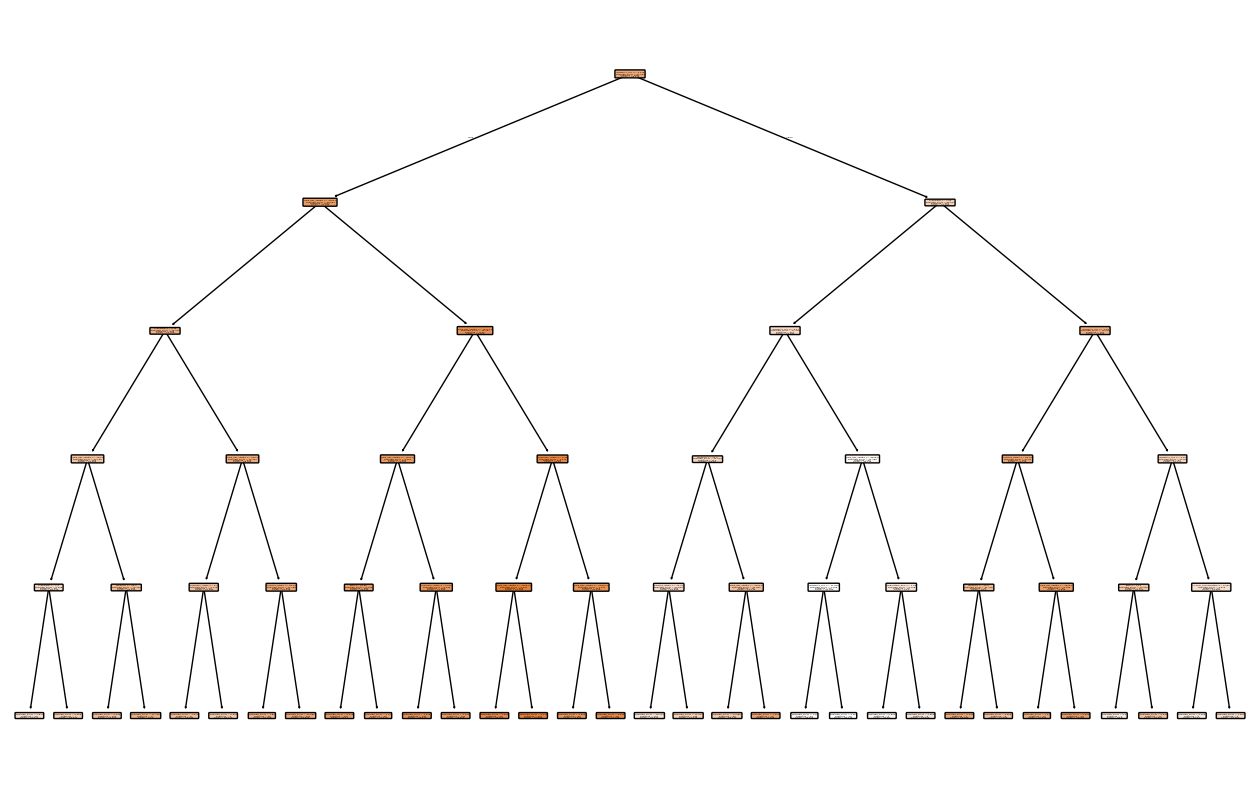

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 10))
plot_tree(regr_1,
          filled=True,
          feature_names=x_train.columns,
          rounded=True)
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8, 10, 12],
    "min_samples_leaf": [1, 2, 4, 6]
}

grid = GridSearchCV(dt, param_grid, cv=5, scoring="neg_mean_squared_error")
grid.fit(x_train, y_train)

print("Best depth:", grid.best_params_)

Best depth: {'max_depth': 12, 'min_samples_leaf': 1}
